In [38]:
import os
import numpy as np
import pandas as pd
from natsort import natsorted
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
#import Fitting_Functions as fitting

In [39]:
dir = 'C:\\Users\\wj2002\\Dropbox (Heriot-Watt University Team)\\RES_EPS_Quantum_Photonics_Lab\\Experiments\\Current Experiments\\Broadband telecom quantum memories\\2022_PrYVO_Spectroscopy\\Infrared\\Laser Spectroscopy'
folder = '20221201_0_1%_PrYVO4_absorp_telecom_laser'
path = dir + '\\' + folder + '\\'
file_list = os.listdir(path)
list_csv=natsorted([i for i in file_list if i.endswith('.CSV')])
file_size=np.shape(list_csv)

Plot_raw_data=1

In [40]:
freq=np.array([190.93889,190.94434,190.95711,190.96882,190.97931,190.98675,190.99255,190.99835,191.01219,191.01884,191.02698,191.03132,191.03703,191.04639,191.06055,191.06615])

Text(0.5, 1.0, 'Reflection reference when laser is parallel to crystal axis')

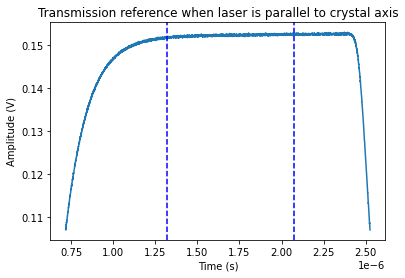

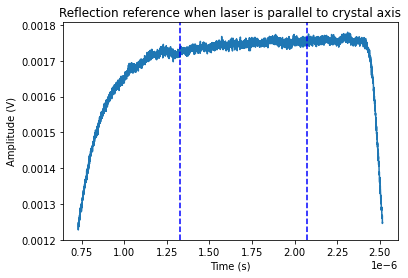

In [41]:
referece_file='OD12101.CSV'
ref_parallel=pd.read_csv(os.path.join(path,referece_file))
ref_parallel=ref_parallel.to_numpy()
transmitted_ref_parallel=ref_parallel[:,2]

T_max_ref_parallel=np.max(transmitted_ref_parallel)
mask1 = (transmitted_ref_parallel[:-1] < T_max_ref_parallel*0.7) & (transmitted_ref_parallel[1:] > T_max_ref_parallel*0.7)
mask2 = (transmitted_ref_parallel[:-1] > T_max_ref_parallel*0.7) & (transmitted_ref_parallel[1:] < T_max_ref_parallel*0.7)
Trigger_pos_T_ref_parallel=np.flatnonzero(mask1 | mask2)+1 # find the rising and falling edges
Trigger_pos_T_ref_parallel_min=np.min(Trigger_pos_T_ref_parallel) # find the minimum value of the rising edge 
Trigger_pos_T_ref_parallel_max=np.max(Trigger_pos_T_ref_parallel) # find the maximum value of the falling edge
pos_T_ref_parallel_start=round(Trigger_pos_T_ref_parallel_min+(Trigger_pos_T_ref_parallel_max-Trigger_pos_T_ref_parallel_min)/3)
pos_T_ref_parallel_stop=round(Trigger_pos_T_ref_parallel_min+(Trigger_pos_T_ref_parallel_max-Trigger_pos_T_ref_parallel_min)*3/4)
T_ref_parallel_ave=np.average(transmitted_ref_parallel[pos_T_ref_parallel_start:pos_T_ref_parallel_stop])

reflected_ref_parallel=ref_parallel[:,3]
R_max_ref_parallel=np.max(reflected_ref_parallel)
mask1 = (reflected_ref_parallel[:-1] < R_max_ref_parallel*0.7) & (reflected_ref_parallel[1:] > R_max_ref_parallel*0.7)
mask2 = (reflected_ref_parallel[:-1] > R_max_ref_parallel*0.7) & (reflected_ref_parallel[1:] < R_max_ref_parallel*0.7)
Trigger_pos_R_ref_parallel=np.flatnonzero(mask1 | mask2)+1 # find the rising and falling edges
Trigger_pos_R_ref_parallel_min=np.min(Trigger_pos_R_ref_parallel) # find the minimum value of the rising edge 
Trigger_pos_R_ref_parallel_max=np.max(Trigger_pos_R_ref_parallel) # find the maximum value of the falling edge
pos_R_ref_parallel_start=round(Trigger_pos_R_ref_parallel_min+(Trigger_pos_R_ref_parallel_max-Trigger_pos_R_ref_parallel_min)/3)
pos_R_ref_parallel_stop=round(Trigger_pos_R_ref_parallel_min+(Trigger_pos_R_ref_parallel_max-Trigger_pos_R_ref_parallel_min)*3/4)
R_ref_parallel_ave=np.average(reflected_ref_parallel[pos_R_ref_parallel_start:pos_R_ref_parallel_stop])

normalised_reference=T_ref_parallel_ave/R_ref_parallel_ave

fig,ax=plt.subplots()
ax.plot(ref_parallel[Trigger_pos_T_ref_parallel_min:Trigger_pos_T_ref_parallel_max,0],ref_parallel[Trigger_pos_T_ref_parallel_min:Trigger_pos_T_ref_parallel_max,2])
ax.axvline(ref_parallel[pos_T_ref_parallel_start,0],color='b',linestyle='dashed')
ax.axvline(ref_parallel[pos_T_ref_parallel_stop,0],color='b',linestyle='dashed')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude (V)')
ax.set_title('Transmission reference when laser is parallel to crystal axis')

fig,ax1=plt.subplots()
ax1.plot(ref_parallel[Trigger_pos_R_ref_parallel_min:Trigger_pos_R_ref_parallel_max,0],ref_parallel[Trigger_pos_R_ref_parallel_min:Trigger_pos_R_ref_parallel_max,3])
ax1.axvline(ref_parallel[pos_R_ref_parallel_start,0],color='b',linestyle='dashed')
ax1.axvline(ref_parallel[pos_R_ref_parallel_stop,0],color='b',linestyle='dashed')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude (V)')
ax1.set_title('Reflection reference when laser is parallel to crystal axis')

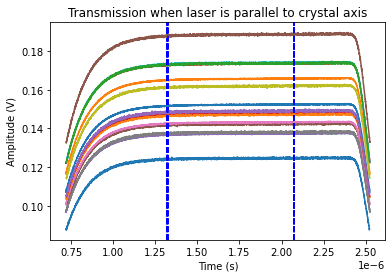

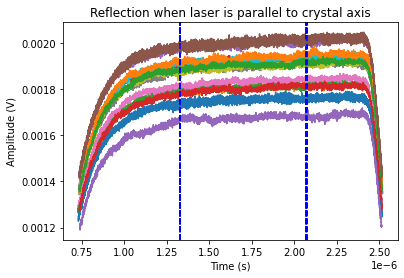

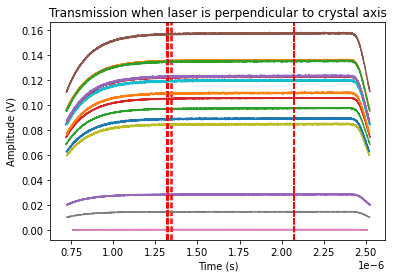

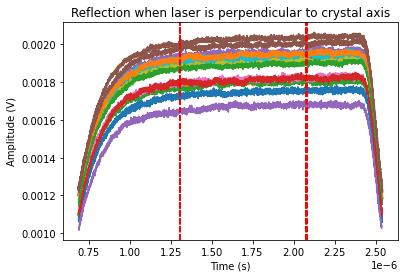

In [42]:
T_parallel_ave=np.empty([int(file_size[0]/2),1])
T_perpendicular_ave=np.empty([int(file_size[0]/2),1])
R_parallel_ave=np.empty([int(file_size[0]/2),1])
R_perpendicular_ave=np.empty([int(file_size[0]/2),1])

if Plot_raw_data==1:
    fig,ax0=plt.subplots()
    fig,ax1=plt.subplots()
    fig,ax2=plt.subplots()
    fig,ax3=plt.subplots()

for index in range(int(file_size[0]/2)):
    data_parallel=pd.read_csv(os.path.join(path,list_csv[index*2]))
    data_parallel=data_parallel.to_numpy()
    data_perpendicular=pd.read_csv(os.path.join(path,list_csv[index*2+1]))
    data_perpendicular=data_perpendicular.to_numpy()

    time_parallel=data_parallel[:,0]
    time_perpendicular=data_perpendicular[:,0]
    
    transmitted_parallel=data_parallel[:,2]
    transmitted_perpendicular=data_perpendicular[:,2]
    T_max_parallel=np.max(transmitted_parallel)
    T_max_perpendicular=np.max(transmitted_perpendicular)

    mask1 = (transmitted_parallel[:-1] < T_max_parallel*0.7) & (transmitted_parallel[1:] > T_max_parallel*0.7)
    mask2 = (transmitted_parallel[:-1] > T_max_parallel*0.7) & (transmitted_parallel[1:] < T_max_parallel*0.7)
    Trigger_pos_T_parallel=np.flatnonzero(mask1 | mask2)+1 # find the rising and falling edges
    Trigger_pos_T_parallel_min=np.min(Trigger_pos_T_parallel) # find the minimum value of the rising edge 
    Trigger_pos_T_parallel_max=np.max(Trigger_pos_T_parallel) # find the maximum value of the falling edge
    pos_T_parallel_start=round(Trigger_pos_T_parallel_min+(Trigger_pos_T_parallel_max-Trigger_pos_T_parallel_min)/3)
    pos_T_parallel_stop=round(Trigger_pos_T_parallel_min+(Trigger_pos_T_parallel_max-Trigger_pos_T_parallel_min)*3/4)
    T_parallel_ave[index]=np.average(transmitted_parallel[pos_T_parallel_start:pos_T_parallel_stop])
    
    mask1 = (transmitted_perpendicular[:-1] < T_max_perpendicular*0.7) & (transmitted_perpendicular[1:] > T_max_perpendicular*0.7)
    mask2 = (transmitted_perpendicular[:-1] > T_max_perpendicular*0.7) & (transmitted_perpendicular[1:] < T_max_perpendicular*0.7)
    Trigger_pos_T_perpendicular=np.flatnonzero(mask1 | mask2)+1
    Trigger_pos_T_perpendicular_min=np.min(Trigger_pos_T_perpendicular)
    Trigger_pos_T_perpendicular_max=np.max(Trigger_pos_T_perpendicular)
    pos_T_perpendicular_start=round(Trigger_pos_T_perpendicular_min+(Trigger_pos_T_perpendicular_max-Trigger_pos_T_perpendicular_min)/3)
    pos_T_perpendicular_stop=round(Trigger_pos_T_perpendicular_min+(Trigger_pos_T_perpendicular_max-Trigger_pos_T_perpendicular_min)*3/4)
    T_perpendicular_ave[index]=np.average(transmitted_perpendicular[pos_T_perpendicular_start:pos_T_perpendicular_stop])
    
    reflected_parallel=data_parallel[:,3]
    reflected_perpendicular=data_perpendicular[:,3]
    R_max_parallel=np.max(reflected_parallel)
    R_max_perpendicular=np.max(reflected_perpendicular)

    mask1 = (reflected_parallel[:-1] < R_max_parallel*0.7) & (reflected_parallel[1:] > R_max_parallel*0.7)
    mask2 = (reflected_parallel[:-1] > R_max_parallel*0.7) & (reflected_parallel[1:] < R_max_parallel*0.7)
    Trigger_pos_R_parallel=np.flatnonzero(mask1 | mask2)+1
    Trigger_pos_R_parallel_min=np.min(Trigger_pos_R_parallel)
    Trigger_pos_R_parallel_max=np.max(Trigger_pos_R_parallel)
    pos_R_parallel_start=round(Trigger_pos_R_parallel_min+(Trigger_pos_R_parallel_max-Trigger_pos_R_parallel_min)/3)
    pos_R_parallel_stop=round(Trigger_pos_R_parallel_min+(Trigger_pos_R_parallel_max-Trigger_pos_R_parallel_min)*3/4)
    R_parallel_ave[index]=np.average(reflected_parallel[pos_R_parallel_start:pos_R_parallel_stop])

    mask1 = (reflected_perpendicular[:-1] < R_max_perpendicular*0.6) & (reflected_perpendicular[1:] > R_max_perpendicular*0.6)
    mask2 = (reflected_perpendicular[:-1] > R_max_perpendicular*0.6) & (reflected_perpendicular[1:] < R_max_perpendicular*0.6)
    Trigger_pos_R_perpendicular=np.flatnonzero(mask1 | mask2)+1
    Trigger_pos_R_perpendicular_min=np.min(Trigger_pos_R_perpendicular)
    Trigger_pos_R_perpendicular_max=np.max(Trigger_pos_R_perpendicular)
    pos_R_perpendicular_start=round(Trigger_pos_R_perpendicular_min+(Trigger_pos_R_perpendicular_max-Trigger_pos_R_perpendicular_min)/3)
    pos_R_perpendicular_stop=round(Trigger_pos_R_perpendicular_min+(Trigger_pos_R_perpendicular_max-Trigger_pos_R_perpendicular_min)*3/4)
    R_perpendicular_ave[index]=np.average(reflected_perpendicular[pos_R_perpendicular_start:pos_R_perpendicular_stop])
    
    if Plot_raw_data==1:
        ax0.plot(time_parallel[Trigger_pos_T_parallel_min:Trigger_pos_T_parallel_max],transmitted_parallel[Trigger_pos_T_parallel_min:Trigger_pos_T_parallel_max])
        ax0.axvline(time_parallel[pos_T_parallel_start],color='b',linestyle='dashed')
        ax0.axvline(time_parallel[pos_T_parallel_stop],color='b',linestyle='dashed')

        ax1.plot(time_parallel[Trigger_pos_R_parallel_min:Trigger_pos_R_parallel_max],reflected_parallel[Trigger_pos_R_parallel_min:Trigger_pos_R_parallel_max],label='Reflection when laser is parallel to crystal axis')
        ax1.axvline(time_parallel[pos_R_parallel_start],color='b',linestyle='dashed')
        ax1.axvline(time_parallel[pos_R_parallel_stop],color='b',linestyle='dashed')

        ax2.plot(time_perpendicular[Trigger_pos_T_perpendicular_min:Trigger_pos_T_perpendicular_max],transmitted_perpendicular[Trigger_pos_T_perpendicular_min:Trigger_pos_T_perpendicular_max],label='Transmission when laser is perpendicular to crystal axis')
        ax2.axvline(time_perpendicular[pos_T_perpendicular_start],color='r',linestyle='dashed')
        ax2.axvline(time_perpendicular[pos_T_perpendicular_stop],color='r',linestyle='dashed')
        
        ax3.plot(time_perpendicular[Trigger_pos_R_perpendicular_min:Trigger_pos_R_perpendicular_max],reflected_perpendicular[Trigger_pos_R_perpendicular_min:Trigger_pos_R_perpendicular_max],label='Reflection when laser is perpendicular to crystal axis')
        ax3.axvline(time_perpendicular[pos_R_perpendicular_start],color='r',linestyle='dashed')
        ax3.axvline(time_perpendicular[pos_R_perpendicular_stop],color='r',linestyle='dashed')

        ax0.set_xlabel('Time (s)')
        ax0.set_ylabel('Amplitude (V)')
        ax0.set_title('Transmission when laser is parallel to crystal axis')

        ax1.set_xlabel('Time (s)')
        ax1.set_ylabel('Amplitude (V)')
        ax1.set_title('Reflection when laser is parallel to crystal axis')
        
        ax2.set_xlabel('Time (s)')
        ax2.set_ylabel('Amplitude (V)')
        ax2.set_title('Transmission when laser is perpendicular to crystal axis')
        
        ax3.set_xlabel('Time (s)')
        ax3.set_ylabel('Amplitude (V)')
        ax3.set_title('Reflection when laser is perpendicular to crystal axis')
        
        fig.patch.set_facecolor('white')

In [55]:
normalised_parallel=np.empty([int(file_size[0]/2),1])
normalised_perpendicular=np.empty([int(file_size[0]/2),1])
OD_parallel=np.empty([int(file_size[0]/2),1])
OD_perpendicular=np.empty([int(file_size[0]/2),1])
for index in range(int(file_size[0]/2)):
    normalised_parallel[index]=T_parallel_ave[index]/R_parallel_ave[index]
    normalised_perpendicular[index]=T_perpendicular_ave[index]/R_perpendicular_ave[index]
    OD_parallel[index]=np.log(normalised_reference/normalised_parallel[index])
    OD_perpendicular[index]=np.log(normalised_reference/normalised_perpendicular[index])


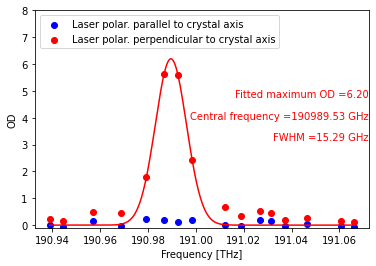

In [92]:
def gaussian(x, height, centre, sigma):
    '''Generates Gaussian with given parameters'''
    return height * np.exp(-(np.power(x - centre, 2) / (2 * sigma ** 2)))
OD_perpendicular_1=OD_perpendicular.flatten()
fit,success=curve_fit(gaussian,freq,OD_perpendicular_1,p0=[5,190.99,0.1])
freq_0=np.linspace(min(freq),max(freq),300)
fit_curve=fit[0]*np.exp(-(np.power(freq_0 - fit[1], 2) / (2 * fit[2] ** 2)))
FWHM=2*np.sqrt(2*np.log(2))*abs(fit[2])*1000

fig,ax=plt.subplots()
ax.plot(freq_0,fit_curve,color='r')
ax.scatter(freq,OD_parallel,color='b', label='Laser polar. parallel to crystal axis')
ax.scatter(freq,OD_perpendicular,color='r', label='Laser polar. perpendicular to crystal axis')
ax.legend(loc='upper left')
ax.set_ylim(-0.1,8)
ax.set_xlabel('Frequency [THz]')
ax.set_ylabel('OD')
ax.annotate('FWHM ='+"{:.2f}".format(FWHM)+' GHz',
            xy=(1.057, 0.3), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom',color='r')
fig.patch.set_facecolor('white')
ax.annotate('Central frequency ='+"{:.2f}".format(fit[1]*1000)+' GHz',
            xy=(1.057, 0.4), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom',color='r')
fig.patch.set_facecolor('white')
ax.annotate('Fitted maximum OD ='+"{:.2f}".format(fit[0]),
            xy=(1.057, 0.5), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom',color='r')
fig.patch.set_facecolor('white')